## California Housing Price Prediction and MNIST Digit Classification

In [1]:
import numpy as np
np.random.seed(42)  # setting random seed for reproducibility
from sklearn.preprocessing import StandardScaler

### 1. Digit Classification : 8 vs others

In [2]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [3]:
# The digits data can be loaded as follows :
from sklearn import datasets
D = datasets.load_digits()
X, y = D["data"], D["target"]

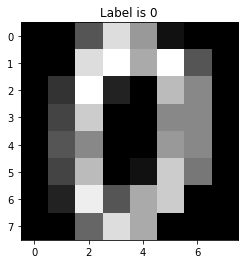

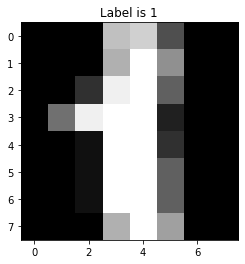

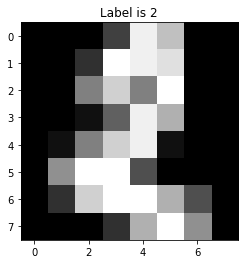

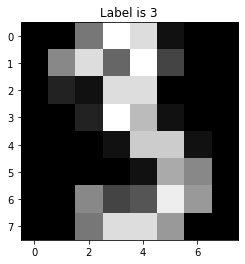

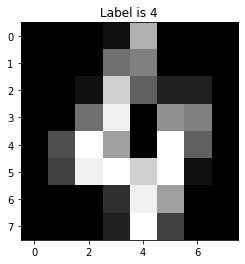

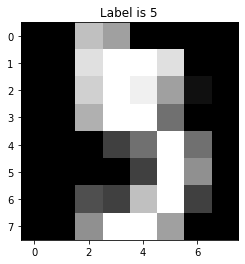

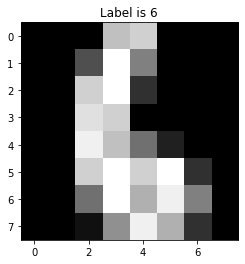

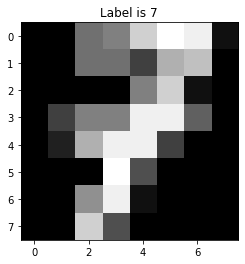

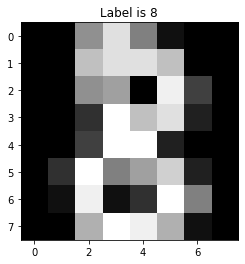

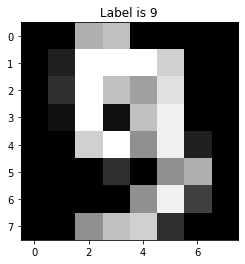

In [4]:
# Plot a few digits to get a sense of how the data looks like
for i in range(10):
    plt.imshow(np.reshape(X[i],(8,8)), cmap='gray')
    plt.title(f'Label is {y[i]}')
    plt.show()

In [5]:
# Create a 2-class classification problem (digit 8 versus other digits)
# 20% for testing and rest for training
y = np.array([1 if i ==8 else 0 for i in y])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [6]:
# Train a logistic regression model with no regularisation for the problem and obtain the cross validation accuracies
lr = LogisticRegression(max_iter=5000, multi_class='ovr',penalty='none')
folds = KFold(n_splits = 5, shuffle = True)
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=folds)
scores

array([0.95833333, 0.9375    , 0.96864111, 0.96167247, 0.95121951])

In [7]:
# Predict values for the test set using the model obtained above 
lr = LogisticRegression(max_iter=5000, multi_class='ovr',penalty='none').fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [8]:
# Obtain all the different performance metrics for the model on the test set
# Confusion matrix 
confusion = metrics.confusion_matrix( y_test, y_pred)
confusion

array([[322,   3],
       [ 10,  25]], dtype=int64)

In [9]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_test, y_pred)

0.9638888888888889

In [10]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [11]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7142857142857143

In [12]:
# Let us calculate specificity
TN / float(TN+FP)

0.9907692307692307

In [13]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.009230769230769232


In [14]:
# positive predictive value 
print (TP / float(TP+FP))

0.8928571428571429


In [15]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9698795180722891


In [16]:
# Change the hyperparameters of the model and see what effect it has on the model
# Find the hyperparameters which maximises the model performance. Choose the right performance metric to evaluate the model


In [17]:
# define models and parameters
model = LogisticRegression(max_iter=5000, multi_class='ovr')
solvers = ['saga', 'liblinear']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print(f'Best Accuracy: {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'Using parameters: {param} got accuracy {round(mean,4)} with std {round(stdev,4)}')

Best Accuracy: 0.9593779015784586 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Using parameters: {'C': 100, 'penalty': 'l1', 'solver': 'saga'} got accuracy 0.9547 with std 0.0109
Using parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'} got accuracy 0.957 with std 0.0103
Using parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'} got accuracy 0.9557 with std 0.0102
Using parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'} got accuracy 0.9566 with std 0.0102
Using parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'} got accuracy 0.9562 with std 0.0109
Using parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'} got accuracy 0.9575 with std 0.0102
Using parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} got accuracy 0.9594 with std 0.0092
Using parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} got accuracy 0.9588 with std 0.0092
Using parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'} got accuracy 0.9508 with std 0.0

In [18]:
# define models and parameters
model = LogisticRegression(max_iter=5000, multi_class='ovr')
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print(f'Best Accuracy: {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'Using parameters: {param} got accuracy {round(mean,4)} with std {round(stdev,4)}')

Best Accuracy: 0.9641963272464664 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Using parameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'} got accuracy 0.9566 with std 0.0109
Using parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'} got accuracy 0.9566 with std 0.0109
Using parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'} got accuracy 0.957 with std 0.0107
Using parameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'} got accuracy 0.9564 with std 0.0109
Using parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'} got accuracy 0.9564 with std 0.0109
Using parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} got accuracy 0.9562 with std 0.0108
Using parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'} got accuracy 0.9562 with std 0.0101
Using parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'} got accuracy 0.9562 with std 0.0101
Using parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'} got accuracy 0.

In [19]:
# define models and parameters
model = LogisticRegression(max_iter=4000, multi_class='ovr')
solvers = ['saga']
penalty = ['elasticnet']
c_values = [1.0, 0.5, 0.01]
l1_values = np.arange(0,1.1,0.2)
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,l1_ratio=l1_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print(f'Best Accuracy: {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'Using parameters: {param} got accuracy {round(mean,4)} with std {round(stdev,4)}')

Best Accuracy: 0.9601186423191994 using {'C': 0.01, 'l1_ratio': 0.2, 'penalty': 'elasticnet', 'solver': 'saga'}
Using parameters: {'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.9551 with std 0.0102
Using parameters: {'C': 1.0, 'l1_ratio': 0.2, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.9553 with std 0.0101
Using parameters: {'C': 1.0, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.9557 with std 0.0102
Using parameters: {'C': 1.0, 'l1_ratio': 0.6000000000000001, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.9562 with std 0.0099
Using parameters: {'C': 1.0, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.9562 with std 0.0104
Using parameters: {'C': 1.0, 'l1_ratio': 1.0, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.9564 with std 0.0104
Using parameters: {'C': 0.5, 'l1_ratio': 0.0, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.9555 with std 0.009

### 2. California Housing Prices

In this problem, we will take the same California Housing prices dataset that was shown in the last lab class to do a binary classification of whether the median house value for a given locality is high or low .

In [20]:
# Get the data from the website to the local directory

import os
import tarfile
from six.moves import urllib

source_path = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
local_path = os.path.join("datasets", "housing")

os.makedirs(local_path, exist_ok=True)
tgz_path = os.path.join(local_path, "housing.tgz")

urllib.request.urlretrieve(source_path, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=local_path)
housing_tgz.close()

In [21]:
# Read the data into a dataframe
housing = pd.read_csv("datasets/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [22]:
# Explore the data to understand it better
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [24]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025FCDD8CD30>,
      dtype=object)

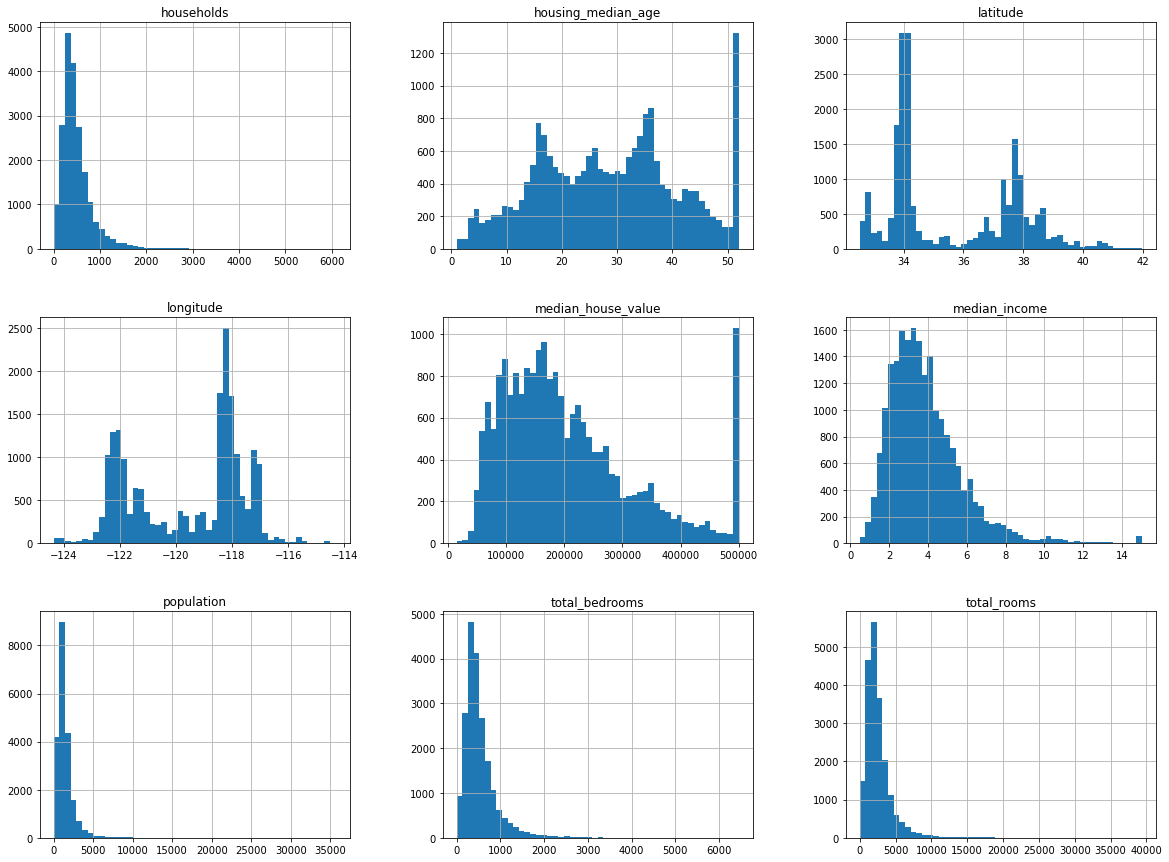

In [25]:
housing.hist(bins=50, figsize=(20,15))

In [26]:
# Convert the data to suit a binary classification of High Price vs Low Price for the median_house_value column
# Assume that anything >= $200,000 is high price with output value 1 and anything less than that is low price with output value 0.
binary_price = [1 if i >=200000 else 0 for i in housing['median_house_value']]
housing['median_house_value'] = binary_price

In [27]:
housing = housing.dropna()

In [28]:
housing = housing.reset_index(drop=True)

In [29]:
housing.shape

(20433, 10)

In [30]:
list(housing.columns)[:-2]

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [31]:
df = housing[list(housing.columns)[:-2]]

In [32]:
normalized_df=(df-df.mean())/df.std()

In [33]:
housing = housing.drop(list(housing.columns)[:-2], 1)

In [34]:
housing = pd.concat([housing,normalized_df],axis=1)

In [35]:
housing.head()

,median_house_value,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1,NEAR BAY,-1.327281,1.051692,0.982139,-0.803793,-0.970301,-0.973296,-0.976809,2.345106
1,1,NEAR BAY,-1.322290,1.042330,-0.606195,2.042080,1.348243,0.861318,1.670332,2.332575
2,1,NEAR BAY,-1.332272,1.037649,1.855723,-0.535176,-0.825541,-0.819749,-0.843406,1.782896
3,1,NEAR BAY,-1.337263,1.037649,1.855723,-0.623495,-0.718750,-0.765037,-0.733544,0.932947
4,1,NEAR BAY,-1.337263,1.037649,1.855723,-0.461959,-0.611959,-0.758860,-0.628914,-0.013143


In [36]:
housing_cat = housing[['ocean_proximity']]

In [37]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [38]:
for i in range(housing_cat_1hot.shape[1]):
    housing[cat_encoder.categories_[0][i]] = housing_cat_1hot[:,i]

In [39]:
housing = housing.drop(columns=['ocean_proximity'])

In [40]:
housing.head()

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1,-1.327281,1.051692,0.982139,-0.803793,-0.970301,-0.973296,-0.976809,2.345106,0.0,0.0,0.0,1.0,0.0
1,1,-1.322290,1.042330,-0.606195,2.042080,1.348243,0.861318,1.670332,2.332575,0.0,0.0,0.0,1.0,0.0
2,1,-1.332272,1.037649,1.855723,-0.535176,-0.825541,-0.819749,-0.843406,1.782896,0.0,0.0,0.0,1.0,0.0
3,1,-1.337263,1.037649,1.855723,-0.623495,-0.718750,-0.765037,-0.733544,0.932947,0.0,0.0,0.0,1.0,0.0
4,1,-1.337263,1.037649,1.855723,-0.461959,-0.611959,-0.758860,-0.628914,-0.013143,0.0,0.0,0.0,1.0,0.0


In [41]:
y = housing['median_house_value']
X = housing.drop(columns=['median_house_value'])

In [42]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [43]:
# Find the best Logistic Regression model that can solve this problem
# define models and parameters
model = LogisticRegression(max_iter=5000, multi_class='ovr')
solvers = ['saga', 'liblinear']
penalty = ['l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print(f'Best Accuracy: {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'Using parameters: {param} got accuracy {round(mean,4)} with std {round(stdev,4)}')

Best Accuracy: 0.8434230674540283 using {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
Using parameters: {'C': 100, 'penalty': 'l1', 'solver': 'saga'} got accuracy 0.8434 with std 0.0057
Using parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'} got accuracy 0.8434 with std 0.0057
Using parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'} got accuracy 0.8434 with std 0.0057
Using parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'} got accuracy 0.8434 with std 0.0057
Using parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'} got accuracy 0.8433 with std 0.0059
Using parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'} got accuracy 0.8432 with std 0.0059
Using parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'} got accuracy 0.8425 with std 0.006
Using parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} got accuracy 0.8425 with std 0.0062
Using parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'} got accuracy 0.8298 with std 0.0

In [44]:
# define models and parameters
model = LogisticRegression(max_iter=4000, multi_class='ovr')
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print(f'Best Accuracy: {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'Using parameters: {param} got accuracy {round(mean,4)} with std {round(stdev,4)}')

Best Accuracy: 0.8433904396954747 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Using parameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'} got accuracy 0.8434 with std 0.0057
Using parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'} got accuracy 0.8434 with std 0.0057
Using parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'} got accuracy 0.8434 with std 0.0057
Using parameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'} got accuracy 0.8434 with std 0.0057
Using parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'} got accuracy 0.8434 with std 0.0057
Using parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} got accuracy 0.8434 with std 0.0057
Using parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'} got accuracy 0.843 with std 0.0059
Using parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'} got accuracy 0.843 with std 0.0059
Using parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'} got accuracy 0.84

In [45]:
# define models and parameters
model = LogisticRegression(max_iter=4000, multi_class='ovr')
solvers = ['saga']
penalty = ['elasticnet']
c_values = [1.0, 0.5, 0.01]
l1_values = np.arange(0,1.1,0.2)
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,l1_ratio=l1_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print(f'Best Accuracy: {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'Using parameters: {param} got accuracy {round(mean,4)} with std {round(stdev,4)}')

Best Accuracy: 0.8432925723883732 using {'C': 1.0, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
Using parameters: {'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.843 with std 0.0059
Using parameters: {'C': 1.0, 'l1_ratio': 0.2, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.843 with std 0.006
Using parameters: {'C': 1.0, 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.8431 with std 0.0059
Using parameters: {'C': 1.0, 'l1_ratio': 0.6000000000000001, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.8431 with std 0.0059
Using parameters: {'C': 1.0, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.8433 with std 0.0059
Using parameters: {'C': 1.0, 'l1_ratio': 1.0, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.8433 with std 0.0059
Using parameters: {'C': 0.5, 'l1_ratio': 0.0, 'penalty': 'elasticnet', 'solver': 'saga'} got accuracy 0.8426 with std 0.006
Usi